In [2]:
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
start = pd.to_datetime("2012-01-01")
end = pd.to_datetime("2017-01-01")

aapl_df = quandl.get(
    dataset = "WIKI/AAPL.11",
    start_date = start, 
    end_date = end
)
cisco_df = quandl.get(
    dataset = "WIKI/CSCO.11",
    start_date = start, 
    end_date = end
)
ibm_df = quandl.get(
    dataset = "WIKI/IBM.11",
    start_date = start, 
    end_date = end
)
amazon_df = quandl.get(
    dataset = "WIKI/AMZN.11",
    start_date = start, 
    end_date = end
)

In [5]:
aapl_df.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [12]:
stock_list = [aapl_df, ibm_df, amazon_df, cisco_df]

for stock_df in stock_list:
    stock_df["returns"] = stock_df["Adj. Close"] / stock_df["Adj. Close"].iloc[0]
    
aapl_df.head()

,Adj. Close,returns
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [14]:
# 30% in Apple
# 20% in Cisco
# 40% in Amazon
# 10% in IBM

portfolio_weights = [0.30, 0.20, 0.40, 0.10]

In [16]:
for stock_df, allocation in zip(stock_list, portfolio_weights):
    stock_df["allocation"] = stock_df["returns"]  * allocation
    
aapl_df.head()

,Adj. Close,returns,allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [17]:
aapl_df.tail()

,Adj. Close,returns,allocation
Date,,,
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610
2016-12-29,115.288214,2.181473,0.654442
2016-12-30,114.389454,2.164467,0.649340


In [18]:
investment_value = 1_000_000

for stock_df in stock_list:
    stock_df["position_values"] = stock_df["allocation"]  * investment_value
    
aapl_df.head()

,Adj. Close,returns,allocation,position_values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [25]:
portfolio_values_df = pd.concat(
    [
        aapl_df.position_values.rename("aapl_position_values"),
        amazon_df.position_values.rename("amazon_position_values"),
        cisco_df.position_values.rename("cisco_position_values"),
        ibm_df.position_values.rename("ibm_position_values"),

    ], 
    axis=1
)

portfolio_values_df.head(3)

,aapl_position_values,amazon_position_values,cisco_position_values,ibm_position_values
Date,,,,
2012-01-03,300000.000000,400000.000000,100000.000000,200000.000000
2012-01-04,301612.236461,396603.921131,101932.367150,199184.111648
2012-01-05,304960.727573,396827.347372,101556.629093,198239.398819


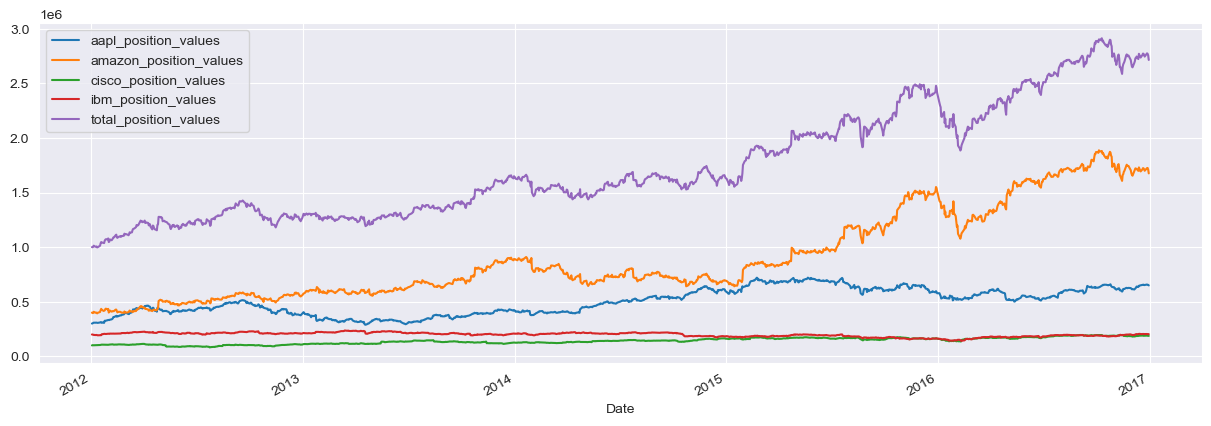

In [26]:
portfolio_values_df["total_position_values"] = portfolio_values_df.sum(axis=1)
portfolio_values_df.plot(figsize=(15, 5));

# Portfolio Stats

In [27]:
portfolio_values_df["daily_returns"] = portfolio_values_df.total_position_values.pct_change()
portfolio_values_df.head()

,aapl_position_values,amazon_position_values,cisco_position_values,ibm_position_values,total_position_values,daily_returns
Date,,,,,,
2012-01-03,300000.000000,400000.000000,100000.000000,200000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,396603.921131,101932.367150,199184.111648,9.993326e+05,-0.000667
2012-01-05,304960.727573,396827.347372,101556.629093,198239.398819,1.001584e+06,0.002253
2012-01-06,308148.724558,407998.659443,101180.891036,195963.499732,1.013292e+06,0.011689
2012-01-09,307659.946988,398949.896665,101825.013419,194943.639291,1.003378e+06,-0.009783


In [28]:
portfolio_values_df.daily_returns.mean()

0.000877922594579895

In [29]:
portfolio_values_df.daily_returns.std()

0.01291593800495105

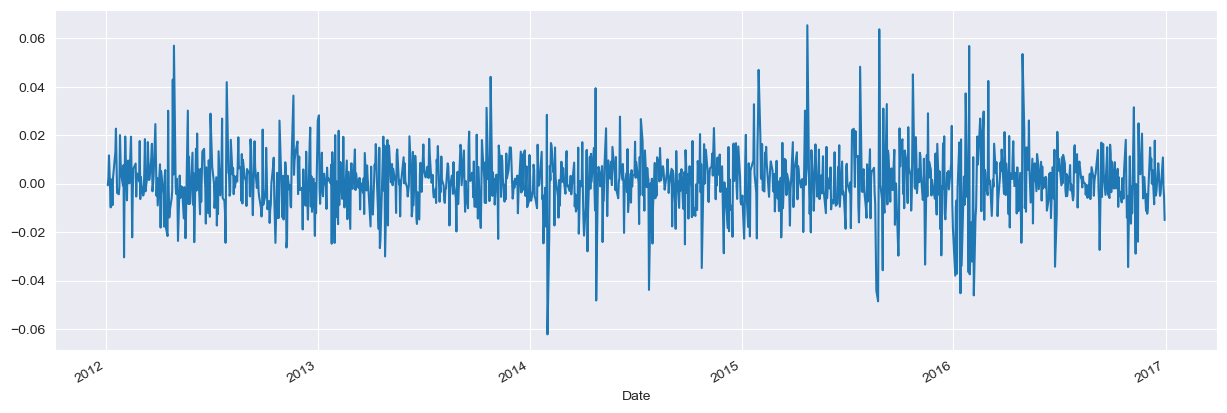

In [31]:
portfolio_values_df.daily_returns.plot(figsize=(15, 5));

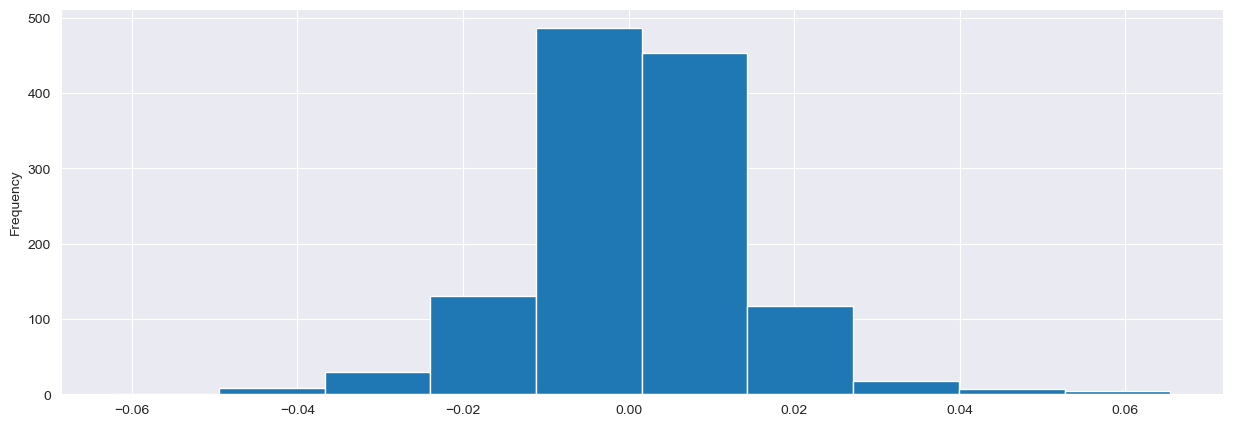

In [32]:
portfolio_values_df.daily_returns.plot.hist(figsize=(15, 5));

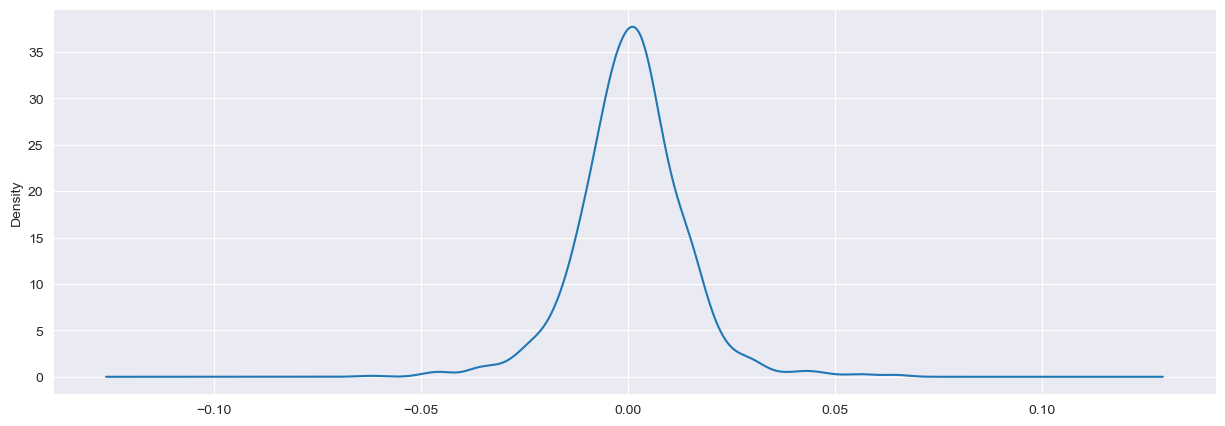

In [33]:
portfolio_values_df.daily_returns.plot(kind="kde", figsize=(15, 5));

In [41]:
cumulative_return = 100 * ((portfolio_values_df.total_position_values[-1] / (portfolio_values_df.total_position_values[0])) - 1)
cumulative_return


171.43648688463693

In [42]:
sharpe_ratio = portfolio_values_df.daily_returns.mean() / portfolio_values_df.daily_returns.std()
sharpe_ratio

0.06797203534449933

In [43]:
annualized_sharpe_ratio = (252 ** 0.5) * sharpe_ratio
annualized_sharpe_ratio

1.0790226097706268